In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
print(cv2.__version__)

4.1.2


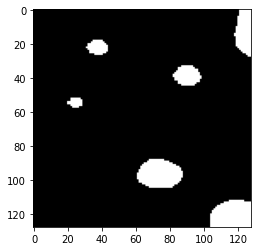

In [0]:
#im = cv2.imread("Лаб 6 водораздел (1).png", cv2.IMREAD_GRAYSCALE)
im = cv2.imread("image.tif", cv2.IMREAD_GRAYSCALE)
ret,im = cv2.threshold(im,70,255,cv2.THRESH_BINARY_INV)
kernel = np.ones((4,4),np.uint8)
im = cv2.erode(im,kernel)
plt.imshow(im, 'gray')

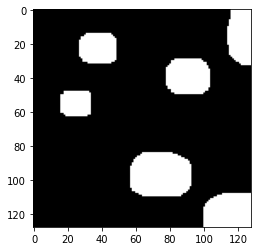

In [0]:
kernel = np.ones((10,10),np.uint8)
gradient = cv2.dilate(im, kernel, iterations = 1)
#blur = cv2.blur(gradient,(5,5))
#ret,binarized = cv2.threshold(blur,23,255,cv2.THRESH_BINARY)
plt.imshow(gradient, 'gray')


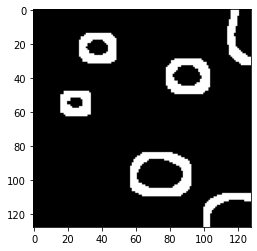

In [0]:
unknown = cv2.subtract(gradient,im)
plt.imshow(unknown, 'gray')

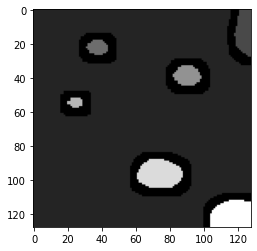

In [0]:
ret, markers = cv2.connectedComponents(im)
markers = markers +1
markers[unknown==255] = 0
plt.imshow(markers, cmap = 'gray')

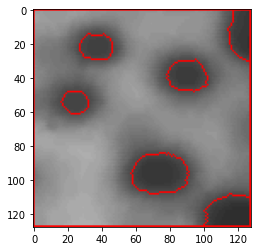

In [0]:
original = cv2.imread("image.tif")
markers = cv2.watershed(original,markers)
original[markers == -1] = [255,0,0]
plt.imshow(original, 'gray')